根据特有风险的研究结果，导入原始数据集和通过iforest删除的异常数据集

## 导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

读取原始结果集

In [2]:
unique_risk = pd.read_csv('unique_risk - 副本.csv')
unique_risk['审核结果']=unique_risk['审核结果'].map({'发行股份购买资产获无条件通过':1,'发行股份购买资产获有条件通过':0})
unique_risk

,Rc,审核结果,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,0.020,1,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0.020,0,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0.045,0,1417.0,0.63,0.29,34.65,14.88,6.20,0.29,0.40,...,44.80,113.26,0.01,1.01,0.02,0.00,0.74,0.93,0.51,0.28
3,0.010,1,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
4,0.005,1,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.035,1,1993.0,0.32,0.27,20.78,14.79,15.03,0.60,0.51,...,205.78,6.66,0.13,1.04,0.01,0.00,0.68,0.45,0.22,0.06
124,0.025,0,2383.0,0.92,0.24,62.11,29.60,13.41,0.77,0.38,...,0.63,0.59,0.79,1.32,2.37,1.13,0.35,0.51,0.14,0.04
125,0.005,1,2700.0,0.86,0.17,92.56,23.42,7.31,0.58,0.51,...,0.12,1.79,0.72,2.20,2.29,0.00,0.01,0.43,0.50,0.00
126,0.030,1,416.0,1.58,0.42,72.80,13.77,5.15,0.47,0.52,...,435.25,1.22,0.81,1.00,0.01,0.00,0.65,0.39,-0.16,0.13


In [3]:
data=unique_risk.drop(labels=['Rc'],axis=1)
target=unique_risk['Rc']

In [4]:
#选取90%的样本用于训练模型，10%用于展示模型
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target, test_size = 0.1, random_state=23)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
train_X = scaler.fit_transform(train_data)
train_y = train_target
test_X= scaler.transform(test_data)
test_y=test_target

读取iforest筛选离散值的结果

In [6]:
unique_risk_i = pd.read_csv('unique_risk_iforest.csv')
unique_risk_i['审核结果']=unique_risk_i['审核结果'].map({'发行股份购买资产获无条件通过':1,'发行股份购买资产获有条件通过':0})
unique_risk_i

,Rc,审核结果,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,0.020,1,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0.020,0,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0.045,0,1417.0,0.63,0.29,34.65,14.88,6.20,0.29,0.40,...,44.80,113.26,0.01,1.01,0.02,0.00,0.74,0.93,0.51,0.28
3,0.010,1,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
4,0.005,1,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.035,1,1993.0,0.32,0.27,20.78,14.79,15.03,0.60,0.51,...,205.78,6.66,0.13,1.04,0.01,0.00,0.68,0.45,0.22,0.06
119,0.025,0,2383.0,0.92,0.24,62.11,29.60,13.41,0.77,0.38,...,0.63,0.59,0.79,1.32,2.37,1.13,0.35,0.51,0.14,0.04
120,0.005,1,2700.0,0.86,0.17,92.56,23.42,7.31,0.58,0.51,...,0.12,1.79,0.72,2.20,2.29,0.00,0.01,0.43,0.50,0.00
121,0.030,1,416.0,1.58,0.42,72.80,13.77,5.15,0.47,0.52,...,435.25,1.22,0.81,1.00,0.01,0.00,0.65,0.39,-0.16,0.13


In [7]:
data_i=unique_risk_i.drop(labels=['Rc'],axis=1)
target_i=unique_risk_i['Rc']

In [8]:
#选取90%的样本用于训练模型，10%用于展示模型
from sklearn.model_selection import train_test_split
train_data_i,test_data_i,train_target_i,test_target_i = train_test_split(data_i,target_i, test_size = 0.1, random_state=23)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
train_X_i = scaler.fit_transform(train_data_i)
train_y_i = train_target_i
test_X_i = scaler.transform(test_data_i)
test_y_i =test_target_i

## 原始数据模型表现

In [49]:
#线性回归
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()

# 岭回归
from sklearn.linear_model import RidgeCV
model_RidgeCV= RidgeCV()

#MLPRegressor神经网络回归
from sklearn.neural_network import MLPRegressor
model_MLPRegressor=MLPRegressor(activation='relu', alpha= 0.0001, hidden_layer_sizes= (5, 5, 5, 5), learning_rate= 'constant', solver= 'lbfgs')

#Adaboost回归
from sklearn import ensemble
from sklearn import tree
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),learning_rate=0.5, n_estimators=50)

#LGBM回归
import lightgbm as lgb
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=19, min_child_weight=0.001, num_leaves=20)

#XGBoost回归
import xgboost as xgb
model_XGBRegressor= xgb.XGBRegressor(booster='dart', eta= 0.2, gamma= 0, max_depth= 9, min_child_weight= 10)

## 原始数据集表现

### 交叉验证的表现

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
score=[]
score=cross_val_score(model_LinearRegression,train_X,train_y,cv=5,scoring='r2')
score.mean()

-441.85866791113233

In [13]:
score=[]
score=cross_val_score(model_RidgeCV,train_X,train_y,cv=5,scoring='r2')
score.mean()

0.08641405241161955

In [14]:
score=[]
score=cross_val_score(model_MLPRegressor,train_X,train_y,cv=5,scoring='r2')
score.mean()

-0.09734787590389557

In [15]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,train_X,train_y,cv=5,scoring='r2')
score.mean()

0.14499788765660102

In [16]:
score=[]
score=cross_val_score(model_LGBM,train_X,train_y,cv=5,scoring='r2')
score.mean()

0.03340210992157209

In [17]:
score=[]
score=cross_val_score(model_XGBRegressor,train_X,train_y,cv=5,scoring='r2')
score.mean()

-0.01313046628190131

### 测试集表现

In [25]:
def show_result(model):
    model.fit(train_X,train_y)
    score = model.score(test_X, test_y)
    result = model.predict(test_X)
    plt.figure()
    plt.plot(np.arange(len(result)), test_y,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

**线性回归**

In [28]:
train_new_data=train_data[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率','研发支出占比']]
test_new_X=scaler.transform(test_new_data)

In [29]:
test_new_X.shape

(13, 6)

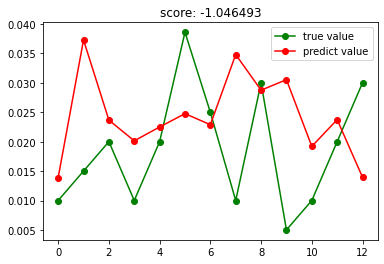

In [30]:
show_result(model_LinearRegression)

**岭回归**

In [31]:
selected_feature=['前三年承诺覆盖率', '动态市盈率', '成立年限', '大股东持股比例', '最近一个完整会计年度对第一大客户的销售占比', 'D/(D+E)', '净利润增长率', '存货周转率', '固定资产周转率', '流动比率', '资产负债率', '毛利率', '研发支出占比']

In [32]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[selected_feature]
test_new_X=scaler.transform(test_new_data)

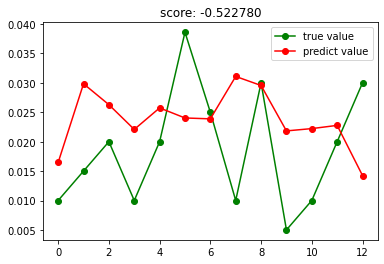

In [33]:
show_result(model_RidgeCV)

**AdaBoost**

In [39]:
selected_feature=["净利润增长率","前三年承诺覆盖率","承诺期业绩增长率","成立年限","总资产增长率","D/(D+E)","上一年归母净利润（万元）","大股东持股比例","最近一个完整会计年度对第一供应商的采购占比","净资产收益率","静态市盈率","动态市盈率","固定资产周转率","存货周转率","注入资产净资产账面值(万元)","归母权益增长率","总资产周转率","毛利率","最近一个完整会计年度对第一大客户的销售占比","应收账款周转率","经营性现金流/收入","经营杠杆（EBITDA/EBIT)","资产负债率","流动比率","（固定资产+土地）/归母权益","在建工程/归母权益","研发支出占比"]

In [40]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[selected_feature]
test_new_X=scaler.transform(test_new_data)

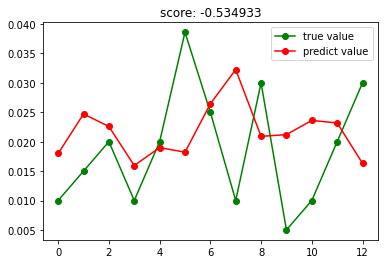

In [41]:
show_result(model_AdaBoostRegressor)

**MLP神经网络**

In [52]:
train_new_data=train_data[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
test_new_X=scaler.transform(test_new_data)

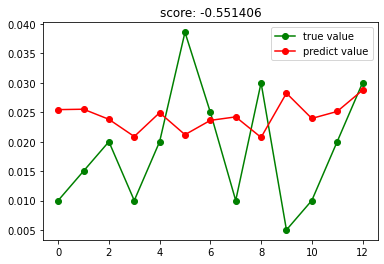

In [56]:
show_result(model_MLPRegressor)

**XGBoost**

In [57]:
train_new_X=train_X
test_new_X=test_X

In [58]:
model_XGBRegressor= xgb.XGBRegressor(booster='dart', eta= 0.2, gamma= 0, max_depth= 9, min_child_weight= 10)

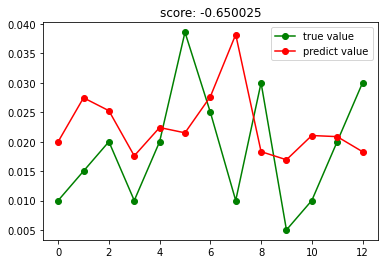

In [59]:
show_result(model_XGBRegressor)

**LGBM回归**

In [60]:
selected_feature=["承诺期业绩增长率","总资产增长率","净资产收益率","大股东持股比例","D/(D+E)","动态市盈率","上一年归母净利润（万元）","前三年承诺覆盖率","净利润增长率","毛利率","成立年限","归母权益增长率","资产负债率"]

In [61]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[selected_feature]
test_new_X=scaler.transform(test_new_data)

In [62]:
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=19, min_child_weight=0.001, num_leaves=20)

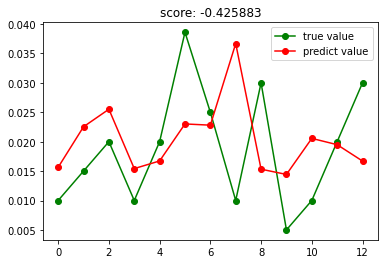

In [63]:
show_result(model_LGBM)

## Iforest数据模型表现

In [64]:
score=[]
score=cross_val_score(model_LinearRegression,train_X_i,train_y_i,cv=5,scoring='r2')
score.mean()

-7.840828566022557

In [65]:
score=[]
score=cross_val_score(model_RidgeCV,train_X_i,train_y_i,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.16582666  0.11733542  0.18397339 -0.10364649  0.058395  ]


0.0843767970464155

In [66]:
score=[]
score=cross_val_score(model_MLPRegressor,train_X,train_y,cv=5,scoring='r2')
score.mean()

-0.14266965194588796

In [67]:
score=[]
score=cross_val_score(model_LGBM,train_X,train_y,cv=5,scoring='r2')
score.mean()

0.03340210992157209

In [68]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,train_X,train_y,cv=5,scoring='r2')
score.mean()

0.16629757534901382

In [69]:
score=[]
score=cross_val_score(model_XGBRegressor,train_X,train_y,cv=5,scoring='r2')
score.mean()

-0.01313046628190131

### 测试集表现

In [70]:
def show_result_i(model):
    model.fit(train_X_i,train_y_i)
    score = model.score(test_X_i, test_y_i)
    result = model.predict(test_X_i)
    plt.figure()
    plt.plot(np.arange(len(result)), test_y,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

**线性回归**

In [71]:
train_new_data_i=train_data_i[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
train_new_X_i=scaler.fit_transform(train_new_data_i)
test_new_data_i=test_data_i[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
test_new_X_i=scaler.transform(test_new_data_i)

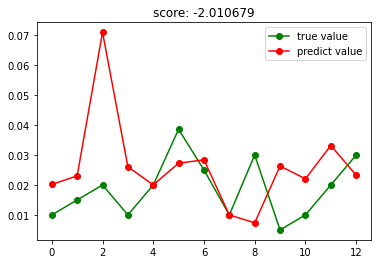

In [72]:
show_result_i(model_LinearRegression)

**岭回归**

In [73]:
train_new_data_i=train_data_i[["净利润增长率","固定资产周转率","前三年承诺覆盖率","应收账款周转率"]]
train_new_X_i=scaler.fit_transform(train_new_data_i)
test_new_data_i=test_data_i[["净利润增长率","固定资产周转率","前三年承诺覆盖率","应收账款周转率"]]
test_new_X_i=scaler.transform(test_new_data_i)

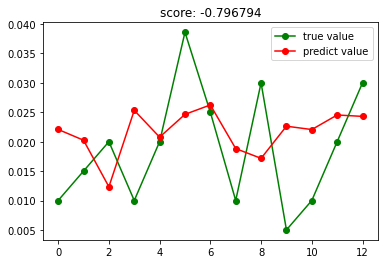

In [74]:
show_result_i(model_RidgeCV)

**AdaBoost**

In [75]:
selected_feature=["净利润增长率","前三年承诺覆盖率","承诺期业绩增长率","成立年限","总资产增长率","D/(D+E)","上一年归母净利润（万元）","大股东持股比例","最近一个完整会计年度对第一供应商的采购占比","净资产收益率","静态市盈率","动态市盈率","固定资产周转率","存货周转率","注入资产净资产账面值(万元)","归母权益增长率","总资产周转率","毛利率","最近一个完整会计年度对第一大客户的销售占比","应收账款周转率","经营性现金流/收入","经营杠杆（EBITDA/EBIT)","资产负债率","流动比率","（固定资产+土地）/归母权益","在建工程/归母权益","研发支出占比"]

In [76]:
train_new_data_i=train_data_i[selected_feature]
train_new_X_i=scaler.fit_transform(train_new_data_i)
test_new_data_i=test_data_i[selected_feature]
test_new_X_i=scaler.transform(test_new_data_i)

In [77]:
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),learning_rate=0.5, n_estimators=50)

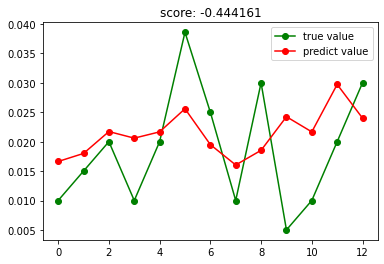

In [78]:
show_result_i(model_AdaBoostRegressor)

**多层感知机**

In [79]:
train_new_data_i=train_data_i[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
train_new_X_i=scaler.fit_transform(train_new_data_i)
test_new_data_i=test_data_i[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
test_new_X_i=scaler.transform(test_new_data_i)

In [80]:
model_MLPRegressor=MLPRegressor(activation='relu', alpha= 0.0001, hidden_layer_sizes= (5, 5, 5, 5), learning_rate= 'constant', solver= 'lbfgs')

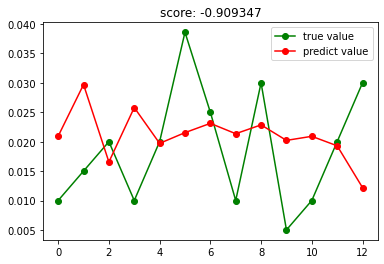

In [81]:
show_result_i(model_MLPRegressor)

**XGBoost**

In [82]:
train_new_X_i=train_X_i
test_new_X_i=test_X_i

In [83]:
model_XGBRegressor= xgb.XGBRegressor(booster='dart', eta= 0.2, gamma= 0, max_depth= 9, min_child_weight= 10)

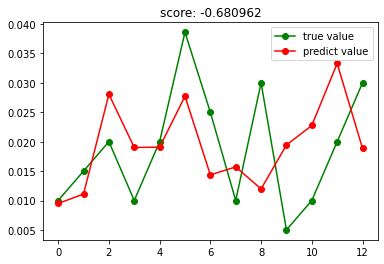

In [84]:
show_result_i(model_XGBRegressor)

**LGBM**

In [85]:
selected_feature=["承诺期业绩增长率","总资产增长率","净资产收益率","大股东持股比例","D/(D+E)","动态市盈率","上一年归母净利润（万元）","前三年承诺覆盖率","净利润增长率","毛利率","成立年限","归母权益增长率","资产负债率"]

In [86]:
train_new_data_i=train_data_i[selected_feature]
train_new_X_i=scaler.fit_transform(train_new_data_i)
test_new_data_i=test_data[selected_feature]
test_new_X_i=scaler.transform(test_new_data_i)

In [87]:
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=19, min_child_weight=0.001, num_leaves=20)

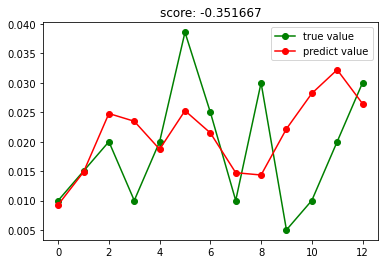

In [88]:
show_result_i(model_LGBM)

## 结果对比

|模型名称	|原始数据集<br>交叉验证分数	|iforest数据集<br>交叉验证分数	|原始测试集<br>分数	|iforest测试集<br>分数|
|-- | -- |-- |-- | -- |
|线性回归	|-441.85867 	|-7.84083 	|-1.06493 	|-2.01068 |
|岭回归	|0.08641 	|0.08438 	|-0.52278 	|-0.79679 |
|多层感知机	|-0.22802 	|-0.09197 	|-0.32717 	|-0.86458 | 
|AdaBoost	|0.08360 	|0.13229 	|-0.40360 	|-0.47673 |
|XGBoost	|-0.01313 	|-0.01313 	|-0.65003 	|-0.68096 |
|LGBM	|0.03340 	|0.03340 	|-0.42588 	|-0.35167 |

直接使用raw和short中的模型，两者的表现都很烂，以至于没有比较的意义。对于iforest对于回归的意义，有待后续进一步研究。